<a href="https://colab.research.google.com/github/kmkzweslen/Aprendizado_Supervisionado/blob/main/supervisionados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALGORITIMO KNN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
pca = PCA(n_components=2)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [ ]:
sma = pd.read_csv('sma.csv', sep=',')
sma.head()

,Q1_Gender,Q2_Living_Area,Q3_Maritial_Status,SMAQ1,SMAQ2,SMAQ3,SMAQ4,SMAQ5,SMAQ6,SMAQ7,SMAQ8,SMAQ9,SMAQ10,SMA_Scale_value,SMA_Scale (Class_Lebel)
0,1,1,2,4,5,1,3,5,2,2,4,5,3,34,2
1,1,1,2,3,2,1,5,5,1,1,2,5,1,26,2
2,2,1,2,3,2,1,1,1,1,1,1,1,1,13,1
3,1,2,2,2,5,5,2,3,1,3,4,4,1,30,2
4,1,1,2,1,4,3,1,2,1,1,1,1,1,16,1


In [ ]:
print(sma.columns.tolist())

['Q1_Gender', 'Q2_Living_Area', 'Q3_Maritial_Status', 'SMAQ1', 'SMAQ2', 'SMAQ3', 'SMAQ4', 'SMAQ5', 'SMAQ6', 'SMAQ7', 'SMAQ8', 'SMAQ9', 'SMAQ10', 'SMA_Scale_value', 'SMA_Scale (Class_Lebel)']


In [ ]:
sma.shape

(1029, 15)

In [ ]:
sma.isnull().sum()

,0
Q1_Gender,0
Q2_Living_Area,0
Q3_Maritial_Status,0
SMAQ1,0
SMAQ2,0
SMAQ3,0
SMAQ4,0
SMAQ5,0
SMAQ6,0
SMAQ7,0


In [ ]:
# variáveis explicativas
X = sma[['Q1_Gender', 'Q2_Living_Area', 'Q3_Maritial_Status',
        'SMAQ1', 'SMAQ2', 'SMAQ3', 'SMAQ4', 'SMAQ5',
        'SMAQ6', 'SMAQ7', 'SMAQ8', 'SMAQ9', 'SMAQ10']]

# Alvo (classificação de dependência)
y = sma['SMA_Scale (Class_Lebel)']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train, y_train)

KNeighborsClassifier()

[[ 69   8   0]
 [ 10 199   1]
 [  0   5  17]]
              precision    recall  f1-score   support

           1       0.87      0.90      0.88        77
           2       0.94      0.95      0.94       210
           3       0.94      0.77      0.85        22

    accuracy                           0.92       309
   macro avg       0.92      0.87      0.89       309
weighted avg       0.92      0.92      0.92       309



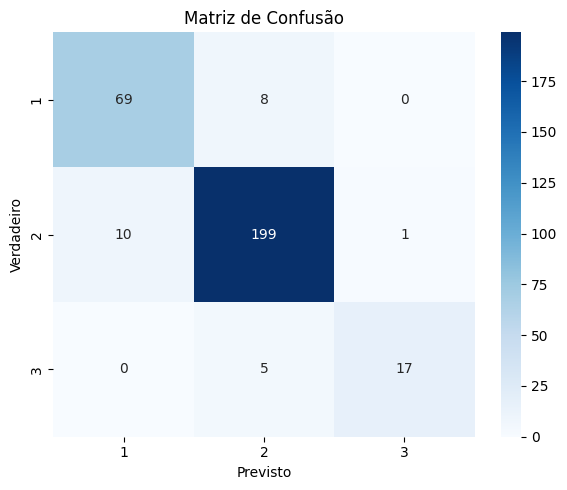

In [ ]:
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.tight_layout()
plt.savefig("matriz_confusao_knn.png")
plt.show()

ALGORITIMO SVM

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

Matriz de Confusão:
[[ 76   1   0]
 [  2 208   0]
 [  0   1  21]]

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98        77
           2       0.99      0.99      0.99       210
           3       1.00      0.95      0.98        22

    accuracy                           0.99       309
   macro avg       0.99      0.98      0.98       309
weighted avg       0.99      0.99      0.99       309



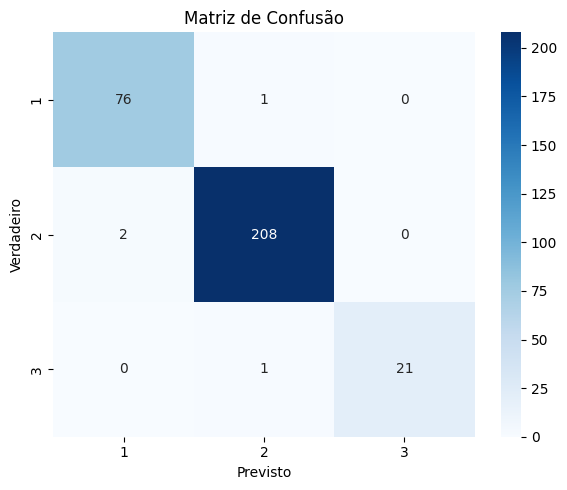

In [ ]:
# Realiza a predição
y_pred = model.predict(X_test)

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.tight_layout()
plt.savefig("matriz_confusao_svm.png")
plt.show()

ALGORITIMO RF

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Matriz de Confusão:
[[ 69   8   0]
 [  9 201   0]
 [  0   5  17]]

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.88      0.90      0.89        77
           2       0.94      0.96      0.95       210
           3       1.00      0.77      0.87        22

    accuracy                           0.93       309
   macro avg       0.94      0.88      0.90       309
weighted avg       0.93      0.93      0.93       309



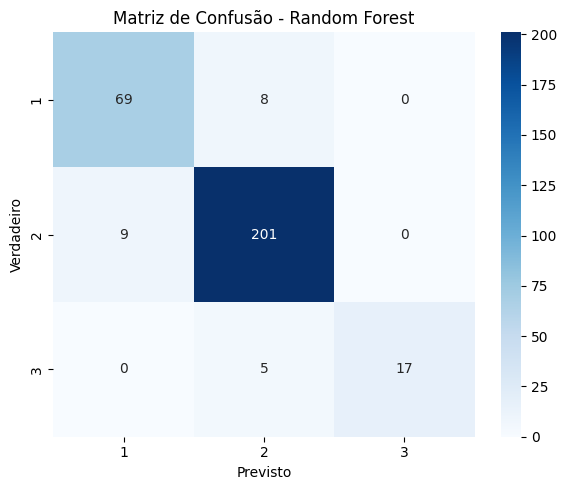

In [ ]:
y_pred = rf.predict(X_test)

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão - Random Forest")
plt.tight_layout()
plt.savefig("matriz_confusao_rf.png")
plt.show()

XGBoost

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [ ]:
model = XGBClassifier(eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train_encoded)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train_encoded)

import warnings
warnings.filterwarnings('ignore')

Acurácia do XGBoost: 0.03

Matriz de Confusão:
[[  0   0   0   0]
 [ 69   8   0   0]
 [  8 201   1   0]
 [  0   6  16   0]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.04      0.10      0.05        77
           2       0.06      0.00      0.01       210
           3       0.00      0.00      0.00        22

    accuracy                           0.03       309
   macro avg       0.02      0.03      0.02       309
weighted avg       0.05      0.03      0.02       309



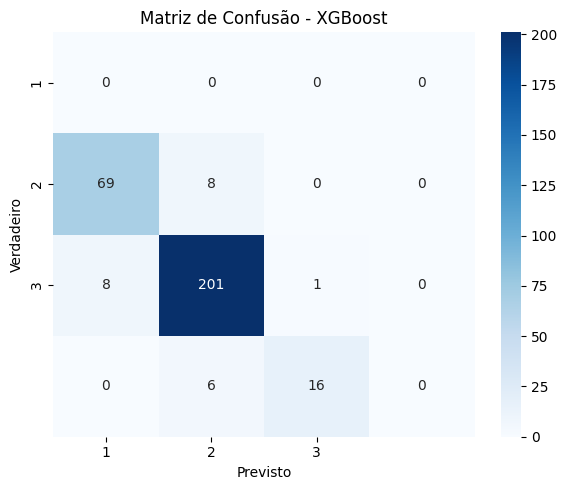

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do XGBoost: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(cm)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão - XGBoost")
plt.tight_layout()
plt.savefig("matriz_confusao_xgboost.png")
plt.show()



          Modelo  Acurácia  Precisão    Recall  F1-score
0            KNN  0.922330  0.922827  0.922330  0.921917
1            SVM  0.951456  0.952434  0.951456  0.950226
2  Random Forest  0.928803  0.929962  0.928803  0.928279
3        XGBoost  0.925566  0.925668  0.925566  0.924552


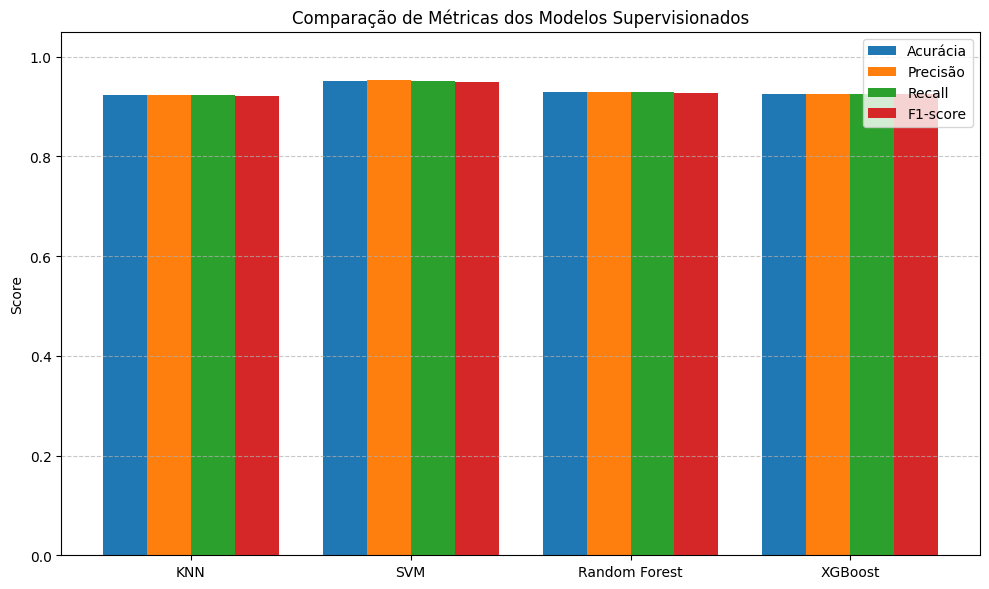

In [ ]:
# Codificar os labels para XGBoost
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Instanciar modelos
knn = KNeighborsClassifier()
svm = SVC(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)

# Treinar modelos (XGBoost com labels codificados)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb_model.fit(X_train, y_train_encoded)

# modelos já treinados
models = {
    'KNN': knn,
    'SVM': svm,
    'Random Forest': rf,
    'XGBoost': xgb_model
}

# Avaliar todos os modelos
results = []

for name, model in models.items():
    if name == 'XGBoost':
        y_pred = model.predict(X_test)
        # Decodificar as previsões para labels originais
        y_pred = le.inverse_transform(y_pred)
        y_true = y_test
    else:
        y_pred = model.predict(X_test)
        y_true = y_test

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    results.append({
        'Modelo': name,
        'Acurácia': acc,
        'Precisão': prec,
        'Recall': rec,
        'F1-score': f1
    })

df_results = pd.DataFrame(results)
print(df_results)


import matplotlib.pyplot as plt
import numpy as np

metrics = ['Acurácia', 'Precisão', 'Recall', 'F1-score']
algorithms = df_results['Modelo']


x = np.arange(len(algorithms))  # Posições no eixo x
width = 0.2  # Largura de cada barra

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, df_results[metric], width, label=metric)

# Configurações do eixo x e rótulos
plt.xticks(x + width * (len(metrics) - 1) / 2, algorithms)
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.title('Comparação de Métricas dos Modelos Supervisionados')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('grafico_comparativo_metricas.png')
plt.show()